In [615]:
import numpy as np
import torch
import rms_torch

H = np.load("array/torch/MG1D_loc/J1_0.5_J2_1_J3_1/2_mel/H/0.npy")
# H2 = np.load("array/torch/HXYZ1D_loc/Jx_0.04851_Jy_5_Jz_1.043_hx_0.4123_hz_0_lt_1/H/0.npy")
u = np.load("array/torch/MG1D_loc/J1_0.5_J2_1_J3_1/2_mel/Adam/lr_0.0002_epoch_10000/loss_0.00006/u/0.npy")


In [616]:
u @ u.T

array([[ 1.00000000e+00, -1.56990161e-15, -4.74520024e-15,
         5.44986333e-16],
       [-1.56990161e-15,  1.00000000e+00, -4.64550604e-16,
         7.98024857e-15],
       [-4.74520024e-15, -4.64550604e-16,  1.00000000e+00,
        -7.31614484e-16],
       [ 5.44986333e-16,  7.98024857e-15, -7.31614484e-16,
         1.00000000e+00]])

In [639]:
u = np.array([
    [0, 1, -1, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1,0,0,-1]
]) / np.sqrt(2)

In [622]:
h_list = [-H]
loss = rms_torch.SystemQUasiEnergyLoss(h_list, device="cpu")
model = rms_torch.UnitaryRieman(
    h_list[0].shape[1], 4, device="cpu").to("cpu")
model.reset_params(torch.from_numpy(u))
loss(model())

tensor(-1.9984e-15, dtype=torch.float64, grad_fn=<SubBackward0>)

In [623]:
from utils import stoquastic
import utils

In [640]:
# u0 = np.array([
#     [1/np.sqrt(2),0,-1/np.sqrt(2)],
#     [1/np.sqrt(2),0,1/np.sqrt(2)],
#     [0,1,0]
# ])
U = np.kron(u,u)

In [626]:
L = 4
h1 = - H
h2 = stoquastic(-U @ H @ U.T)
HS1 = utils.sum_ham(h1, [[i, (i+1)%L] for i in range(L)], L, 4)
HS2 = utils.sum_ham(h2, [[i, (i+1)%L] for i in range(L)], L, 4)

In [86]:
e2, v2 = np.linalg.eigh(h1)
e1, v1 = np.linalg.eigh(h2)

In [22]:
L * 1/2 * 3 / 4

1.5

In [445]:
J = np.array([-1, 5, 0.3])
h = np.array([0.1, 0, 0.4])

In [313]:
import numpy as np
from lattice.core.constants import *

In [314]:
SySy

array([[ 0.  ,  0.  ,  0.  , -0.25],
       [ 0.  ,  0.  ,  0.25,  0.  ],
       [ 0.  ,  0.25,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.  ,  0.  ]])

In [315]:
SzSz

array([[ 0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.  , -0.  ],
       [ 0.  ,  0.  , -0.25, -0.  ],
       [ 0.  , -0.  , -0.  ,  0.25]])

In [87]:
import numpy as np

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def rotation_matrix(theta, phi):
    # Convert angles from degrees to radians

    # Rotation matrix around the x-axis
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(phi), -np.sin(phi)],
                   [0, np.sin(phi), np.cos(phi)]])
    
    
    # Rotation matrix around the z-axis
    Rz = np.array([[np.cos(theta), 0, -np.sin(theta)],
                   [0, 1, 0],
                   [np.sin(theta), 0, np.cos(theta)]])
    
    print(Rz)

    # Combined rotation matrix (Rz first, then Rx)
    R = np.dot(Rz, Rx)

    return R

r, theta, phi = cartesian_to_spherical(h[0], h[1], h[2])

In [88]:
theta

0.2449786631268647

In [97]:
theta

0.2449786631268647

In [93]:
import scipy
U2 = scipy.linalg.expm(-1j * theta * Sy)

In [99]:
U2.T.conj() @ Sx @ U2

array([[ 0.12126782+0.j,  0.48507127+0.j],
       [ 0.48507127+0.j, -0.12126782+0.j]])

In [105]:
J = np.array([-1, 5, 0.3])
h = np.array([0, 0, 0])
rot = (np.pi/2 - theta)/2
R = rotation_matrix(0.1, phi)


h = R.T @ R.T @ h
J = R.T @ J
h_single = h[2] * Sz + h[0] * Sx
h_single = np.kron(h_single, I2) + np.kron(I2, h_single)

H = J[0] * SxSx + J[1] * SySy + J[2] * SzSz + h_single
np.linalg.eigvalsh(H)

[[ 0.99500417  0.         -0.09983342]
 [ 0.          1.          0.        ]
 [ 0.09983342  0.          0.99500417]]


array([-1.39167987, -1.10832013,  0.9091528 ,  1.5908472 ])

In [109]:
H.shape

(16, 16)

In [225]:
import scipy
A = np.random.rand(4,4)
A = A - A.T
C = np.random.normal(size=(16, 16))
C = C + C.T
C += np.eye(C.shape[0])
S = np.sign(C)
lr = 0.001
u = scipy.linalg.expm(lr * A)
U = np.kron(u,u)
B = U @ C @ U.T

In [227]:
A_kron = np.kron(np.eye(4), A) + np.kron(A, np.eye(4))
V = lr * S * (A_kron @ C - C @ A_kron)

In [228]:
D = np.abs(B) - np.abs(C) 
np.linalg.norm(D - V)

3.32892918971711e-05

In [235]:
Ec, Vc = np.linalg.eigh(np.abs(C))
Eb, Vb = np.linalg.eigh(np.abs(B))

In [236]:
Vc[:,-1] @(np.abs(B) - np.abs(C)) @ Vc[:,-1]

0.0015303424247277374

In [231]:
Vc[:,-1] @ V @ Vc[:,-1]

0.0015471042778119751

In [169]:
Ec[-1] - Eb[-1]

0.0005381927101524298

In [244]:
A = np.random.rand(4,4)
A = A - A.T
C = np.random.normal(size=(16, 16))
C = np.copy(H)
C += np.eye(C.shape[0])
S = np.sign(C)

In [245]:
lr = 0.001
u = scipy.linalg.expm(lr * A)
U = np.kron(u,u)
B = U @ C @ U.T

In [246]:
Ec, Vc = np.linalg.eigh(np.abs(C))
Eb, Vb = np.linalg.eigh(np.abs(B))

In [247]:
Ec[-1]

2.250000000000001

In [248]:
Eb[-1]

2.2502670342126136

In [240]:
D = U @ C @ U.T - C
DS = np.round(S * D,3)

In [241]:
np.abs(C) - np.abs(B)

array([[-1.18461542e-06, -1.93680935e-04, -5.81763744e-04,
        -5.39955093e-04, -5.81570727e-04, -2.69953816e-04,
        -2.70171237e-04, -3.51983840e-07, -1.93993391e-04,
        -2.69870533e-04, -2.69787398e-04, -6.66706471e-08,
        -5.40050845e-04, -6.68596866e-08, -4.85459433e-07,
        -5.83070183e-07],
       [-1.93680935e-04,  7.66723266e-05,  7.71463330e-05,
        -3.17806155e-05, -7.69838853e-05, -2.53773342e-04,
        -1.64031060e-04, -5.97740598e-08, -2.00875133e-07,
        -3.57838347e-04, -5.98006983e-08, -2.69978013e-04,
        -1.64012402e-04, -2.70032760e-04, -1.90728072e-07,
        -2.22627374e-07],
       [-5.81763744e-04,  7.71463330e-05, -7.66575617e-05,
        -3.03610107e-05,  5.40528653e-07, -2.04295561e-04,
        -9.16181335e-05, -2.69962621e-04,  7.69992451e-05,
        -1.02248812e-04, -1.93817827e-04, -6.70275139e-08,
        -2.25256559e-04, -8.98186882e-09, -2.70001710e-04,
        -6.64013536e-08],
       [-5.39955093e-04, -3.17806155e

In [249]:
Vc[:,-1] @(np.abs(C) - np.abs(B)) @ Vc[:,-1]

-0.0002594141697731783

In [250]:
Ec[-1] - Eb[-1]

-0.00026703421261276006

In [265]:
(C @ A_kron - A_kron @ C)*S

array([[ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        -0.        , -0.        ,  0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.17394196,  0.17394196, -0.        , -0.17394196,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.        ,  0.17394196, -0.17394196, -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.17394196, -0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        ],
       [ 0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.17394196,  0.17394196, -0.        ,  0.        ,  0.17394196,
        -0.        , -0.        ,  0.        , -0.        , -0.        ,
        -0.        ],
       [ 0.        , -0.17394196, -0

## Optimize random Hamiltonian

In [822]:
import scipy
sps = 3
A = np.random.normal(size=(sps**2, sps**2))
A = A + A.T
A -= np.eye(sps**2) * 4
h_list = [A]
loss = rms_torch.SystemQUasiEnergyLoss(h_list, device="cpu")
model = rms_torch.UnitaryRieman(
    h_list[0].shape[1], sps, device="cpu").to("cpu")
model.reset_params(torch.from_numpy(np.eye(sps)))
loss(model())



tensor(3.2682, dtype=torch.float64, grad_fn=<SubBackward0>)

In [838]:
optimizer = rms_torch.Adam(model.parameters(),lr=0.000001)

for _ in range(10000):
    optimizer.zero_grad()
    output = model()
    loss_val = loss(output)
    loss_val_item = loss_val.item()
    loss_val.backward()
    for p in model.parameters():
        grad = p.grad
        if grad is not None:
            grad.data[:] = rms_torch.riemannian_grad_torch(p.data, grad)
    optimizer.step()
    print(loss_val_item)

2.810107528461325
2.8101086269572786
2.8101089885788344
2.8101085184028722
2.810108102233821
2.810107230587368
2.810106030714346
2.8101059944637985
2.810106814284536
2.8101071758376133
2.8101071018077253
2.810106668204421
2.8101063708898213
2.81010659338874
2.8101065695739766
2.810106323934777
2.8101063066812006
2.8101061495262076
2.8101064755654352
2.810106651586368
2.810106511912453
2.810106093031843
2.8101059779653763
2.810106405560015
2.810106525936602
2.8101063227462237
2.8101060374132363
2.8101061455490726
2.8101063860207933
2.8101063337223398
2.810106588469731
2.8101061878403133
2.8101059862607958
2.8101063290691304
2.8101063290891357
2.810106028057211
2.81010627154283
2.810106280241625
2.810106680466907
2.8101065455376304
2.8101058655121935
2.8101059714465553
2.8101062206703293
2.8101062063862
2.8101059135038664
2.8101059240149358
2.8101060888193157
2.8101058256755653
2.810106128699873
2.8101063523610623
2.810106368425659
2.810106248118375
2.81010599388331
2.810105875290974
2.8

2.8101057613574003
2.8101057074873967
2.810105916272155
2.8101058064198643
2.8101060813874117
2.810106081402475
2.8101057697543954
2.810106269533856
2.810106247722514
2.810106367304188
2.8101063505071107
2.810106257532242
2.8101064662799313
2.8101064140263237
2.810106056475073
2.8101064639220663
2.8101063941107984
2.8101061887947427
2.810106262941064
2.8101060737833254
2.8101060964781386
2.8101063140248588
2.8101064650109873
2.8101061729201415
2.8101059812039484
2.8101060234138213
2.8101063038991523
2.810106523704073
2.810106465470051
2.8101061568208063
2.8101058462017914
2.8101064634759094
2.8101064015996275
2.8101063082659277
2.8101062140771145
2.810106334986651
2.8101063684240994
2.8101061422000324
2.8101057623859997
2.810106427972338
2.810106349513868
2.810105762621399
2.8101059295391924
2.8101059774313537
2.8101058511820636
2.810105775385276
2.8101062741063654
2.8101061179866544
2.8101060696439166
2.8101061458643013
2.810106368085977
2.810106308263494
2.810105973740514
2.810105998

2.8101060310006734
2.8101059270553552
2.810106059609895
2.810105906061347
2.8101060916316474
2.810106192875603
2.810106265601201
2.810106464148385
2.8101063598193665
2.8101061621721914
2.810106152738408
2.810105995589476
2.810105961595392
2.8101060402182316
2.8101061086508867
2.810106280579598
2.810106305171997
2.8101061194785064
2.810105941152367
2.810106022927817
2.8101059031323476
2.8101060012906007
2.810106183200171
2.810106248165882
2.8101061634211195
2.81010602875382
2.810105826718031
2.810106510200166
2.8101063912273023
2.8101058176628104
2.8101060637395303
2.810106197598147
2.810106161038819
2.8101059129776242
2.810105858692433
2.8101058557627265
2.810105856392065
2.810105984187791
2.810106067064277
2.810106106082978
2.8101060237472257
2.8101059270483812
2.810105999950858
2.8101058662180964
2.8101060105252262
2.810106211146321
2.810106262887045
2.810106160985965
2.810105960170409
2.8101058823691805
2.810106242807082
2.810106005749427
2.810105927926651
2.8101062689297134
2.81010

2.8101059913742734
2.810106384525751
2.810106528587701
2.8101066087291198
2.8101065199404385
2.810106374858071
2.810106035257734
2.810106118080986
2.810106413172546
2.8101061882021643
2.8101061860950285
2.8101059251397995
2.8101061211172844
2.810106384715974
2.810106188806996
2.8101058816323263
2.810106048913985
2.810106232863655
2.8101063038726526
2.810106109008613
2.81010591011532
2.81010600510365
2.8101060826213295
2.810105945403345
2.8101058908726504
2.8101059909629935
2.810105903828946
2.81010579417862
2.8101058061080924
2.8101057789410735
2.8101058686465183
2.8101058797491145
2.8101057572654735
2.8101060389970467
2.8101060331373997
2.810106093568999
2.8101062941229724
2.8101064058034044
2.8101063716764987
2.8101060823696837
2.81010599577308
2.810106361714274
2.810106338411922
2.8101059222053255
2.8101060903860517
2.8101061428058163
2.8101060805376843
2.8101059810123648
2.810105882043585
2.8101057835492913
2.8101059240463773
2.8101058768488105
2.8101057615915703
2.8101062526519645

2.8101063409971534
2.810106372665631
2.810105880804594
2.8101058894222266
2.8101060282844674
2.8101060131170765
2.810105951987973
2.8101058328136705
2.810105717346774
2.8101059237524613
2.810106050029388
2.8101057982113513
2.8101059954388123
2.810105925201805
2.810106137287905
2.8101057771730655
2.810106140448612
2.8101064384189822
2.8101065434149444
2.810106430754777
2.810106196788725
2.8101060205910837
2.8101059275831073
2.8101065245595027
2.81010639310861
2.8101058958036393
2.810105967135174
2.8101061436359327
2.810106185341853
2.81010602288236
2.8101059097614804
2.8101062772531744
2.810106219562
2.810105881673268
2.8101060323704576
2.810106187989989
2.810106040710524
2.8101059370633568
2.8101060968921683
2.8101058923903626
2.8101060181235606
2.810106197736909
2.8101060896131447
2.8101061518715564
2.810105969810424
2.8101060144599916
2.8101059941755064
2.810106056580432
2.8101060203085826
2.8101060103524294
2.810106014474494
2.8101062355775657
2.810106186974858
2.8101060242864246
2.

2.8101063595561673
2.810106220655035
2.810106137169223
2.810106568252687
2.81010659342647
2.810106124303486
2.810106175527883
2.810106220699362
2.810106148011366
2.81010614854217
2.8101059265510617
2.810105808974745
2.810106212988151
2.8101061576659934
2.810105980998161
2.810106180440199
2.8101061524962265
2.8101059198960723
2.8101060226217793
2.8101060733429737
2.810105853820742
2.8101059564298243
2.810106126473423
2.810106050100414
2.8101060144826153
2.8101059182875456
2.8101062005194013
2.8101060853651436
2.8101062010592504
2.8101061783029255
2.8101063828026565
2.8101064981346067
2.8101062864880095
2.8101059445754277
2.8101059971920623
2.8101067226768297
2.8101066718335392
2.8101059486976414
2.8101061521180473
2.810106593792918
2.8101068263103652
2.8101068280379398
2.8101066220654634
2.810106316564111
2.810106212564511
2.810106122518457
2.810106813112073
2.810106845135534
2.8101060938865903
2.8101061409405492
2.810106180322146
2.81010605775729
2.810106257749604
2.8101062116947535
2.

2.8101062122746487
2.8101064080750877
2.810106328692159
2.8101060016375694
2.8101060235381485
2.810106036487616
2.81010612468255
2.810106268788635
2.810106190855313
2.81010599175543
2.810105807727078
2.8101064608349464
2.810106302219756
2.810105925561336
2.8101060804226723
2.8101062131297514
2.8101061425077614
2.8101060805971674
2.8101059514460776
2.8101060669411897
2.810105825866694
2.8101059701038746
2.810106024466746
2.810105801088385
2.8101060259342763
2.8101059851502317
2.810105953244788
2.8101058892226565
2.810105875412164
2.810105804182749
2.8101061840418584
2.810105821558933
2.81010607761638
2.810106357796604
2.810106416205654
2.8101062610991416
2.8101060468028667
2.81010599396293
2.8101061645767924
2.8101059677310634
2.8101061134172145
2.8101062178419642
2.81010641922847
2.810106463482951
2.810106192092176
2.8101063241140327
2.810106250296533
2.8101063732899743
2.810106348730498
2.810105907172103
2.8101059734943963
2.8101061160081375
2.810106074316126
2.810106034305088
2.81010

2.8101061042347926
2.8101062858371986
2.8101063663268153
2.8101062310064204
2.810105901453815
2.81010608194528
2.81010613516373
2.8101058879777288
2.810106058150234
2.810106108328428
2.810106175614388
2.8101059647472884
2.8101058611961367
2.8101061028419085
2.8101059168543205
2.810105921449095
2.810106122972451
2.8101061370004015
2.810105983847807
2.810105956595299
2.8101060736102443
2.8101059268696584
2.810106044769258
2.8101062764613065
2.810106376792911
2.810106349630521
2.8101061406838124
2.8101060633298243
2.8101059444344845
2.81010605968776
2.810105794368736
2.810105962343785
2.810106168336782
2.810106211661287
2.810106001572697
2.8101058763591578
2.8101062734142364
2.810106211383806
2.810105935291853
2.810106093400302
2.81010620599813
2.8101062413811153
2.8101061095087143
2.81010592187007
2.8101058116319795
2.8101064934903963
2.8101063269768307
2.8101058004923534
2.810106105110295
2.8101061272244596
2.810105956179692
2.810105816878634
2.810106406403216
2.810106248076794
2.810105

2.8101059947123996
2.81010602586222
2.8101059641505604
2.810105982357948
2.810106070745176
2.8101058514676165
2.810105857444457
2.810105813533953
2.8101057247233125
2.8101058642962915
2.8101059408341182
2.810106063755546
2.8101059830191506
2.810106285688315
2.810106117032811
2.810106055648413
2.8101061072149225
2.8101061298632306
2.810105866740111
2.8101061901846744
2.8101062388640603
2.8101064770760846
2.8101065859894323
2.81010642791094
2.810106267676881
2.8101065768310622
2.8101065570317108
2.810106226318476
2.8101064138466345
2.8101062623728605
2.810106342605211
2.8101066241572514
2.81010662144889
2.810106362903811
2.810106110294063
2.810106289647292
2.810106284524954
2.810106102450904
2.81010591217448
2.810106097937899
2.810106324303435
2.810106271916597
2.8101059686498875
2.8101061782512406
2.810106484111058
2.8101063046930594
2.8101060221639447
2.8101063144030594
2.81010659344871
2.8101065884691554
2.810106327865986
2.8101058371978116
2.810106583025048
2.810106827379345
2.810106

2.81010597915858
2.810106096305086
2.810106034189717
2.8101063600110923
2.8101060093988597
2.810106173302726
2.8101064066968835
2.8101064650857435
2.810106448800445
2.8101063961328183
2.810106103787719
2.8101058739254743
2.8101066300009254
2.8101067825999007
2.8101061795788187
2.810106120151664
2.8101065123994378
2.810106852200816
2.810106844862462
2.8101065250964528
2.8101066802703283
2.8101067195359217
2.810106498893676
2.8101060443331836
2.8101071241429434
2.810107346613199
2.810106715609061
2.810106412826597
2.8101066422950804
2.8101065356521193
2.810106821133841
2.8101070593487005
2.8101070177579697
2.81010672434118
2.8101062042772345
2.8101061933031897
2.8101067171573657
2.8101068875077306
2.8101061971746777
2.8101060603996846
2.810106502878396
2.810106645118916
2.8101065171456394
2.810106398307509
2.8101063750959003
2.8101061338632523
2.810105991389248
2.8101063273767384
2.8101062512404997
2.8101061369591296
2.8101060993760836
2.8101062250719604
2.8101063188360005
2.810106090051

2.8101060259234263
2.8101059346718973
2.8101059015726637
2.810106431759168
2.8101061236272304
2.8101059175899916
2.810106230898951
2.810106350762476
2.810106353703011
2.810106055952259
2.810106123125104
2.8101062559496643
2.810106234944614
2.810105937945556
2.810106039297194
2.810106122642493
2.8101060502105017
2.8101060157100353
2.810105886595677
2.810105759576997
2.8101062261545042
2.8101059572059253
2.810106155461172
2.810106436485208
2.8101065314546805
2.8101064505506965
2.810106218705199
2.810105957173265
2.8101059879133405
2.810105858241643
2.8101057855817917
2.8101058199304365
2.8101058389812064
2.810105935930066
2.810106026193127
2.8101061392273063
2.8101061121515674
2.810105882132847
2.8101058404914756
2.8101059149724623
2.810105779363182
2.8101058067380453
2.8101061929478863
2.810105883333966
2.810106050180499
2.810106326470345
2.810106389674784
2.810106240241934
2.810105941431358
2.8101058639030665
2.810106680868879
2.81010663653972
2.8101060241041846
2.810105988261286
2.810

2.8101062372056607
2.8101063304165326
2.810106244323178
2.810106394801865
2.810106334825912
2.8101059675206894
2.810106082955924
2.8101062567459554
2.810106066976102
2.8101059618120683
2.8101061776878193
2.810106252425678
2.8101060178171036
2.810105777232037
2.8101060633504726
2.8101060991328826
2.8101060442564556
2.810105734874883
2.8101059460559927
2.8101061171428103
2.8101057735470167
2.810105983128187
2.8101059815150062
2.8101057425177647
2.8101061281008928
2.8101058277737128
2.810105755634341
2.8101058605753675
2.810105862849534
2.810106000729556
2.8101059611127166
2.8101057449094125
2.8101061931850406
2.8101059706504987
2.8101059878703563
2.81010618330936
2.810106306029871
2.8101061044466693
2.8101060295149285
2.8101059646121325
2.8101058824507863
2.81010589418492
2.8101060609493036
2.810105963835065
2.810105983803103
2.8101060467926455
2.810105913156308
2.8101058914284405
2.8101058486708137
2.8101058947964592
2.8101058540270625
2.8101058689453904
2.8101059268282302
2.81010593629

2.810106598505408
2.810106477815678
2.8101060742094024
2.8101060022815805
2.8101060663674655
2.810106006140755
2.8101060050553404
2.810106112972038
2.8101062092730142
2.810106043201687
2.810106079442617
2.810105905091687
2.8101061622899355
2.8101060214310625
2.8101059896228353
2.810106211036567
2.8101063525563443
2.81010623221073
2.8101060102472264
2.810105783616878
2.8101065000664622
2.8101064369691233
2.810105795496286
2.8101060470465935
2.8101061425997127
2.8101060352295537
2.810105905611765
2.810105942146036
2.8101057570918204
2.8101057589086107
2.8101059655383285
2.8101061006714065
2.810106025749027
2.810105948821354
2.8101057755356944
2.810106405878882
2.810106158579588
2.8101060804096054
2.81010618350407
2.8101063648255487
2.810106572061853
2.8101064856150817
2.81010609443109
2.8101059236344543
2.8101060693160367
2.810106161323459
2.810106092230688
2.810106216898907
2.810106278999191
2.8101060215053284
2.810106020922765
2.8101060490668477
2.8101061318130522
2.810106279301438
2.8

2.810105891463513
2.8101058960140453
2.8101057538646668
2.810106109983119
2.8101058763390636
2.8101059928069123
2.8101062001644745
2.8101062830002963
2.8101063440242573
2.810106115243288
2.810106010781853
2.8101061659018374
2.81010618169954
2.8101062930880847
2.810106181756611
2.8101062473269227
2.810106265849848
2.8101061978007014
2.810106095204441
2.8101059537614805
2.8101058143189963
2.810106422679924
2.810106191543783
2.8101059815882348
2.8101062740811305
2.8101063309235723
2.810106175681655
2.8101058678847064
2.8101058233660385
2.8101059861661053
2.810106115940629
2.81010599073454
2.810105994926035
2.8101059273475375
2.810105982214276
2.8101060320663063
2.810106027828299
2.8101060673535887
2.8101060385122008
2.8101060984176147
2.810106036665834
2.8101060209760487
2.8101059506691737
2.8101057320557725
2.8101060617909983
2.810106040614075
2.8101060817102397
2.810106266191534
2.8101062258232172
2.81010598308953
2.8101060661542423
2.8101059799627865
2.810105950896345
2.810106008491283

2.810105844899299
2.8101060976212207
2.810105844045813
2.810105820703642
2.8101057791990858
2.810106070381851
2.8101061462704013
2.8101062081665003
2.810106261612587
2.8101060698203657
2.810106031761732
2.810106024343783
2.810106124899006
2.8101062114553077
2.8101062185730026
2.8101060433419054
2.8101058123387137
2.8101060174093977
2.8101059180624812
2.8101059722825443
2.8101062031143744
2.8101062566480888
2.8101061618500918
2.8101061739117252
2.810106013765017
2.810106187921102
2.810106121230204
2.8101060134515254
2.810106172519335
2.810106260410082
2.810106299232965
2.8101061543033996
2.8101060447036925
2.8101058352652952
2.8101065319137586
2.8101064104919278
2.8101059029394744
2.8101060034143917
2.810106066623179
2.8101059171039946
2.8101058022309093
2.810105782704367
2.8101058237833225
2.810105923346603
2.8101058266552226
2.810105986617211
2.8101058717879486
2.8101059249779983
2.810106219707256
2.8101059424647357
2.81010593999458
2.81010613446813
2.8101062594071937
2.81010623327002

2.8101063591338917
2.810106342125936
2.8101060860589673
2.810105880256332
2.8101062144484406
2.810106170715189
2.810105995505742
2.8101060888418505
2.810106171532583
2.810106216109455
2.8101060510185594
2.8101060161106286
2.810106251393643
2.8101063996693174
2.8101065439008277
2.8101064187989326
2.8101060512952873
2.8101062608769265
2.810106400984383
2.810106351563464
2.8101060888126863
2.8101058975664035
2.8101063834988853
2.8101065860474765
2.8101065134324745
2.8101061931697675
2.810105959826407
2.810105933173938
2.810105976787172
2.810106049114326
2.810105812367331
2.8101058737992215
2.810105973920164
2.8101058454736023
2.810106060063921
2.810105916358909
2.81010599221265
2.8101061553651423
2.810106222807436
2.8101060069468407
2.8101060382735685
2.8101061504491103
2.8101060459191363
2.810106095279453
2.810106190314988
2.810106263321865
2.810106451618866
2.810106312430486
2.810106173068183
2.81010607424046
2.8101059507774497
2.8101058575320987
2.810105822599594
2.8101059417633234
2.8

In [839]:
u1 = list(model.parameters())[0].detach().numpy()
U1 = np.kron(u1, u1)

In [840]:
EUS, VUS = np.linalg.eigh(utils.stoquastic(U1@h_list[0]@U1.T))
ES, VS = np.linalg.eigh(utils.stoquastic(h_list[0]))

In [841]:
EUS[0], ES[0]

(-17.03697592526484, -17.495121516995212)

### Check if the optimized matrix islocal minimum point

In [844]:
import scipy
B1 = U1@h_list[0]@U1.T
diff = []
for _ in range(5000):
    G = np.random.normal(size=(sps,sps))
    if _%4 == 0:
        G = G - G.T
    S = np.sign(B1)
    lr = 0.00001
    v = scipy.linalg.expm(lr * G)
    V = np.kron(v,v)
    B2 = V @ B1 @ np.linalg.inv(V)
    EUS2, VUS2 = np.linalg.eig(utils.stoquastic(B2))
    ES2, VS2 = np.linalg.eig(utils.stoquastic(B1))
    diff.append(np.min(EUS2.real) - np.min(ES2.real))

### The value will increase for all gradient direction.

This mean first order of gradient is 0

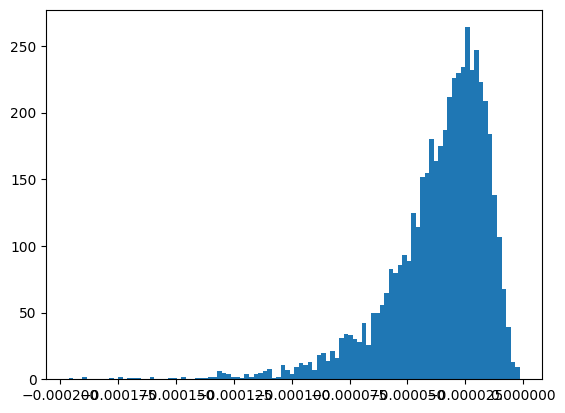

In [845]:
from matplotlib import pyplot as plt

plt.hist(diff, bins = 100)
plt.show()

In [846]:
lr = 0.001
quasi_diff = []
B1 = U1@h_list[0]@U1.T
# B1 = np.copy(AU)
for _ in range(100):
    g = np.random.rand(sps, sps)
    g = g - g.T
    for _ in range(2):
        g = -g
        v = scipy.linalg.expm(lr * g)
        V = np.kron(v,v)
        B2 = V @ B1 @ V.T
        EUS2, VUS2 = np.linalg.eigh(utils.stoquastic(B2))
        ES2, VS2 = np.linalg.eigh(utils.stoquastic(B1))
    #     idxu = np.argmin(EUS2.real)
    #     idx = np.argmin(ES2.real)
        idxu = 0
        idx = 0
        eus20 = EUS2.real[idxu]
        es20 = ES2.real[idx]
        diff = es20 - eus20
        C = np.sign(B1)
        C2 = np.sign(B2)
    #     print((C==0).sum())
    #     print("diff:", diff)
        ev = VS2[:, idx]
    #     print("peterbation diff : ",ev @ -(utils.stoquastic(B2)-utils.stoquastic(B1))@ ev)
        G = np.kron(np.eye(sps), g) + np.kron(g, np.eye(sps))
        R = G @ B1 - B1 @ G
        np.linalg.norm(B1 + lr * R - B2)
    #     print(np.linalg.norm(ev @ (utils.stoquastic(B2) + B1*C) @ ev))
    #     print(ev @ ((B1 - B2)*C) @ ev)
    #     print(ev @ (R*C) @ ev)
        Tp = utils.stoquastic(B2) - (-C * B2) 
    #     Tp /= lr
    #     print(np.round(Tp,3))
        print("quasi diff : ", (ev @ (-R*C*lr+ Tp) @ ev))
        quasi_diff.append(((ev @ (-R*C*lr+ Tp) @ ev), (ev @ (-R*C*lr) @ ev), ev @ Tp @ ev, Tp, -R*C*lr+ Tp))

quasi diff :  -0.00040676878145137383
quasi diff :  -0.0004427421520211478
quasi diff :  -0.0013734185158490635
quasi diff :  -0.002089537364039472
quasi diff :  -0.0011977690493449396
quasi diff :  -0.0014534617547886403
quasi diff :  -0.0025724730496809634
quasi diff :  -0.001575007840449868
quasi diff :  -0.0006316689912632045
quasi diff :  -0.001210382262220346
quasi diff :  -0.0006176475805801156
quasi diff :  -0.00028473031466759826
quasi diff :  -0.0018421519529082005
quasi diff :  -0.0024151438411559446
quasi diff :  -0.0013063501222331311
quasi diff :  -0.0010961332383450455
quasi diff :  -0.0013805366313090067
quasi diff :  -0.0006503392783727637
quasi diff :  -0.001117566874657246
quasi diff :  -0.0027227468163563704
quasi diff :  -0.0025387977856039076
quasi diff :  -0.0014294193433117012
quasi diff :  -0.0014804270968845328
quasi diff :  -0.0031745841984584244
quasi diff :  -0.0035620163275408524
quasi diff :  -0.001967913014427701
quasi diff :  -0.0018410803384712173
quas

In [847]:
np.min(np.abs(B1))

5.7879947519067235e-08

In [852]:
ev 






@ quasi_diff[0][-1] @ ev

-0.00040676878145137383